In [1]:
from pandas_datareader import data
from pandas_datareader import wb
import numpy as np
import pandas_datareader
import pandas as pd
from influxdb import InfluxDBClient
import math
import quandl
import datetime

In [2]:
quandl.ApiConfig.api_key="yEFb5f6a7oQL91qzEsvg"
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers1=[];

#tickers1.append('XBT')
tickers=tickers1

# Define which online source one should use
data_source = 'quandl'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2015-12-26'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
#panel_data = data.DataReader('NASDAQOMX/COMP', data_source, start_date, end_date,api_key="yEFb5f6a7oQL91qzEsvg")  #NASDAQ https://www.quandl.com/data/NASDAQOMX/COMP-NASDAQ-Composite-COMP
#print(panel_data)
#panel_data2 = data.DataReader('MULTPL/SP500_REAL_PRICE_MONTH', data_source, start_date, end_date) #S&P500 https://www.quandl.com/data/MULTPL/SP500_REAL_PRICE_MONTH-S-P-500-Real-Price-by-Month
#print(panel_data2)
#panel_data3 = data.DataReader('BCB/UDJIAD1', data_source, start_date, end_date)  #DowAndJones https://www.quandl.com/data/BCB/UDJIAD1-Dow-Jones-Industrial-Average
#print(panel_data3)
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
#close = panel_data.ix['Close']
#quandl.get("NASDAQOMX/NDX", authtoken="yEFb5f6a7oQL91qzEsvg")
# Getting all weekdays between 01/01/2000 and 12/31/2016
#all_weekdays = pd.date_range(start=start_date, end=end_date)

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
#close = close.reindex(all_weekdays)

#close.head(100)

#a=close;

#close.head(100)

# NASDAQ Composite (COMP)

The NASDAQ Composite Index measures all NASDAQ domestic and international based common type stocks listed on The NASDAQ Stock Market. Today the NASDAQ Composite includes over 2,500 companies, more than most other stock market indexes. Because it is so broad-based, the Composite is one of the most widely followed and quoted major market indexes.

In [3]:
#quandl.get("NASDAQOMX/COMP", authtoken="yEFb5f6a7oQL91qzEsvg", start_date="2003-01-20")
df = quandl.get('NASDAQOMX/COMP', api_key='yEFb5f6a7oQL91qzEsvg',start_date = '1960-01-01',end_date = '2016-12-26')
a=df
a.rename(columns={'Index Value' : 'index_value'}, inplace=True)

In [4]:
#year=2003
month="-01-01"
total_val_NASDAQ=[];
year_val_NASDAQ=[];
j=0;
for year in range(2003,2016):
    ab=a.loc[str(year)+month:str((year+1))+month].index_value
    #for x in ab:
    #    print(ab.iloc[x])
    i=0;
    total=0;
    print("NASDAQ total val for",year)
    for column in ab:
        #print(ab.iloc[i])
        total=total+ab.iloc[i]
        i=i+1;
    total_val=total/i
    print(total_val)
    try:
        total_val_NASDAQ.append(total_val);
        print(total_val_NASDAQ)
        year_val_NASDAQ.append(str(year)+"-12-31"+"T00:00:00Z")
    except IndexError:   
        print("Out of loop")
    j=j+1;


NASDAQ total val for 2003
1658.077
[1658.0770000000007]
NASDAQ total val for 2004
1986.34535714
[1658.0770000000007, 1986.3453571428588]
NASDAQ total val for 2005
2099.822749
[1658.0770000000007, 1986.3453571428588, 2099.8227490039835]
NASDAQ total val for 2006
2263.40996016
[1658.0770000000007, 1986.3453571428588, 2099.8227490039835, 2263.4099601593612]
NASDAQ total val for 2007
2578.46661355
[1658.0770000000007, 1986.3453571428588, 2099.8227490039835, 2263.4099601593612, 2578.4666135458156]
NASDAQ total val for 2008
2164.24361111
[1658.0770000000007, 1986.3453571428588, 2099.8227490039835, 2263.4099601593612, 2578.4666135458156, 2164.243611111111]
NASDAQ total val for 2009
1845.38496032
[1658.0770000000007, 1986.3453571428588, 2099.8227490039835, 2263.4099601593612, 2578.4666135458156, 2164.243611111111, 1845.3849603174601]
NASDAQ total val for 2010
2349.89353175
[1658.0770000000007, 1986.3453571428588, 2099.8227490039835, 2263.4099601593612, 2578.4666135458156, 2164.243611111111, 18

# S&P 500 Real Price by Month

What is S&P 500 Real Price by Month ?? 

The Standard & Poor's 500, often abbreviated as the S&P 500, or just the S&P,[6][7] is an American stock market index based on the market capitalizations of 500 large companies having common stock listed on the NYSE or NASDAQ. The S&P 500 index components and their weightings are determined by S&P Dow Jones Indices. It differs from other U.S. stock market indices, such as the Dow Jones Industrial Average or the Nasdaq Composite index, because of its diverse constituency and weighting methodology. It is one of the most commonly followed equity indices, and many consider it one of the best representations of the U.S. stock market, and a bellwether for the U.S. economy.[8] The National Bureau of Economic Research has classified common stocks as a leading indicator of business cycles.[9]

The S&P 500 was developed and continues to be maintained by S&P Dow Jones Indices, a joint venture majority-owned by S&P Global. S&P Dow Jones Indices publishes many stock market indices such as the Dow Jones Industrial Average, S&P MidCap 400, the S&P SmallCap 600, and the S&P Composite 1500. It is a free-float capitalization-weighted index,[5] and has many ticker symbols, such as: ^GSPC,[10] INX,[11] and $SPX.[12]

In [5]:
SP500 = quandl.get('MULTPL/SP500_REAL_PRICE_MONTH', api_key='yEFb5f6a7oQL91qzEsvg',start_date = '1960-01-01',end_date = '2017-12-26')
#print(SP500)
month="-01-01"
total_val_SP500=[];
year_val_SP500=[];
j=0;
for year in range(1960,2018):
    ab=SP500.loc[str(year)+month:str((year+1))+month].Value
    #for x in ab:
    #    print(ab.iloc[x])
    i=0;
    total=0;
    print("SP500 total val for",year)
    for column in range(0,12):
        #print(ab.iloc[i])
        total=total+ab.iloc[i]
        i=i+1;
    total_val=total/i
    print(total_val)
    try:
        total_val_SP500.append(total_val);
        #print(total_val_SP500)
        year_val_SP500.append(str(year)+"-12-31"+"T00:00:00Z")
    except IndexError:   
        print("Out of loop")
    j=j+1;

SP500 total val for 1960
55.85
SP500 total val for 1961
66.2725
SP500 total val for 1962
62.3825
SP500 total val for 1963
69.865
SP500 total val for 1964
81.3683333333
SP500 total val for 1965
88.17
SP500 total val for 1966
85.2566666667
SP500 total val for 1967
91.9283333333
SP500 total val for 1968
98.6941666667
SP500 total val for 1969
97.84
SP500 total val for 1970
83.22
SP500 total val for 1971
98.2833333333
SP500 total val for 1972
109.208333333
SP500 total val for 1973
107.423333333
SP500 total val for 1974
82.5525
SP500 total val for 1975
86.1558333333
SP500 total val for 1976
102.021666667
SP500 total val for 1977
98.21
SP500 total val for 1978
96.02
SP500 total val for 1979
103.0225
SP500 total val for 1980
118.783333333
SP500 total val for 1981
128.041666667
SP500 total val for 1982
119.725
SP500 total val for 1983
160.425
SP500 total val for 1984
160.466666667
SP500 total val for 1985
186.85
SP500 total val for 1986
236.358333333
SP500 total val for 1987
286.841666667
SP500

# Dow Jones Industrial Average

It is the second-oldest U.S. market index after the Dow Jones Transportation Average, created by Wall Street Journal editor and Dow Jones & Company co-founder Charles Dow. Currently owned by S&P Dow Jones Indices, which is majority owned by S&P Global, it is the most notable of the Dow Averages, of which the first (non-industrial) was originally published on February 16, 1885. The averages are named after Dow and one of his business associates, statistician Edward Jones. The industrial average was first calculated on May 26, 1896.[2]

The Industrial portion of the name is largely historical, as many of the modern 30 components have little or nothing to do with traditional heavy industry. Since the divisor is currently less than one, the value of the index is larger than the sum of the component prices. Although the Dow is compiled to gauge the performance of the industrial sector within the American economy, the index's performance continues to be influenced by not only corporate and economic reports, but also by domestic and foreign political events such as war and terrorism, as well as by natural disasters that could potentially lead to economic harm.

Some of the major companies in this include:
Apple, Walmart, JP morgan, McDonald's

In [6]:
DJIA= quandl.get('BCB/UDJIAD1', api_key='yEFb5f6a7oQL91qzEsvg',start_date = '1960-01-01',end_date = '2017-12-26')
#DJIA["Value"]
month="-01-01"
total_val_DJIA=[];
year_val_DJIA=[];
j=0;
for year in range(1960,2017):
    ab=DJIA.loc[str(year)+month:str((year+1))+month].Value
    #for x in ab:
    #    print(ab.iloc[x])
    i=0;
    total=0;
    print("DJIA total val for",year)
    for column in ab:
        #print(ab.iloc[i])
        total=total+ab.iloc[i]
        i=i+1;
    total_val=total/i
    print(total_val)
    try:
        total_val_DJIA.append(total_val);
        print(total_val_SP500)
        year_val_DJIA.append(str(year)+"-12-31"+"T00:00:00Z")
    except IndexError:   
        print("Out of loop")
    j=j+1;

DJIA total val for 1960
618.02218254
[55.849999999999994, 66.272499999999994, 62.382499999999993, 69.864999999999995, 81.368333333333339, 88.169999999999973, 85.256666666666661, 91.928333333333327, 98.694166666666661, 97.839999999999989, 83.219999999999999, 98.283333333333346, 109.20833333333333, 107.42333333333333, 82.552499999999995, 86.15583333333332, 102.02166666666666, 98.209999999999994, 96.019999999999982, 103.02249999999999, 118.78333333333335, 128.04166666666666, 119.72500000000002, 160.42500000000004, 160.46666666666667, 186.84999999999999, 236.35833333333335, 286.84166666666664, 265.78333333333336, 322.83333333333331, 334.58750000000003, 376.17750000000001, 415.74416666666679, 451.40666666666669, 460.32916666666665, 541.63833333333321, 670.82833333333338, 872.67333333333329, 1084.3108333333332, 1326.0608333333334, 1427.0074999999999, 1192.0783333333334, 995.63, 963.68916666666655, 1130.5475000000004, 1207.0608333333332, 1310.6699999999998, 1476.6333333333332, 1220.8883333333

875.72064
[55.849999999999994, 66.272499999999994, 62.382499999999993, 69.864999999999995, 81.368333333333339, 88.169999999999973, 85.256666666666661, 91.928333333333327, 98.694166666666661, 97.839999999999989, 83.219999999999999, 98.283333333333346, 109.20833333333333, 107.42333333333333, 82.552499999999995, 86.15583333333332, 102.02166666666666, 98.209999999999994, 96.019999999999982, 103.02249999999999, 118.78333333333335, 128.04166666666666, 119.72500000000002, 160.42500000000004, 160.46666666666667, 186.84999999999999, 236.35833333333335, 286.84166666666664, 265.78333333333336, 322.83333333333331, 334.58750000000003, 376.17750000000001, 415.74416666666679, 451.40666666666669, 460.32916666666665, 541.63833333333321, 670.82833333333338, 872.67333333333329, 1084.3108333333332, 1326.0608333333334, 1427.0074999999999, 1192.0783333333334, 995.63, 963.68916666666655, 1130.5475000000004, 1207.0608333333332, 1310.6699999999998, 1476.6333333333332, 1220.8883333333331, 946.73583333333352, 11

# The Russell 1000

In [7]:
Russell= quandl.get('NASDAQOMX/NQUSS', api_key='yEFb5f6a7oQL91qzEsvg',start_date = '1960-01-01',end_date = '2015-12-26')
Russell.rename(columns={'Index Value' : 'index_value'}, inplace=True)
month="-01-01"
total_val_Russell=[];
year_val_Russell=[];
j=0;
for year in range(2011,2016):
    ab=Russell.loc[str(year)+month:str((year+1))+month].index_value
    #for x in ab:
    #    print(ab.iloc[x])
    i=0;
    total=0;
    print("Russell total val for",year)
    for column in ab:
        #print(ab.iloc[i])
        if(math.isnan(ab.iloc[i])):
            #print("no")
            i=i+1;
        else:
            total=total+ab.iloc[i]
            i=i+1;
    total_val=total/i
    print(total_val)
    try:
        total_val_Russell.append(total_val);
        print(total_val_Russell)
        year_val_Russell.append(str(year)+"-12-31"+"T00:00:00Z")
    except IndexError:   
        print("Out of loop")
    j=j+1;
j=j+1;

Russell total val for 2011
886.7049375
[886.70493750000003]
Russell total val for 2012
970.01768
[886.70493750000003, 970.01768000000004]
Russell total val for 2013
1230.45880952
[886.70493750000003, 970.01768000000004, 1230.458809523808]
Russell total val for 2014
1402.04305882
[886.70493750000003, 970.01768000000004, 1230.458809523808, 1402.043058823529]
Russell total val for 2015
1425.66322957
[886.70493750000003, 970.01768000000004, 1230.458809523808, 1402.043058823529, 1425.6632295719837]


# Happiness

In [8]:
from bs4 import BeautifulSoup
import urllib.request

In [9]:
ra = urllib.request.urlopen("https://worlddatabaseofhappiness.eur.nl/hap_nat/desc_na_genpublic.php?cntry=35")
r=ra.read()
soup = BeautifulSoup(r)
print(type(soup))
#print(soup.prettify()[0:1000000])

<class 'bs4.BeautifulSoup'>


/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [10]:
import numbers
a=soup.table
#b=a[0].next_element
#print(b)
i=0;
time=[]
happiness=[]
for row in a.find_all("tr")[1:]:  #row by row
    col = row.find_all("td") # differentiating the td into columns.
    col = [ele.text.strip() for ele in col]
    i=i+1;
    print(i)
    try:                     #trying to convert the parameters into integer and float numbers.
        a=int(col[2]) 
        b=float(col[3])
        if(b<3 and a>1900):
            print(a,b)
            time.append(a)
            happiness.append(b)
    except OSError as err:
        print("OS error: {0}".format(err))
    except ValueError:
        print("Could not convert data to an integer.") 
    except:
        print("Unexpected error:", sys.exc_info()[0])
        raise
        #print(col)
        print("---")
    
print(time)
print(happiness)



1
Could not convert data to an integer.
2
Could not convert data to an integer.
3
Could not convert data to an integer.
4
1946 2.29
5
1947 2.32
6
1948 2.33
7
1952 2.38
8
1952 2.38
9
1956 2.48
10
1956 2.48
11
1956 2.49
12
1956 2.47
13
1957 2.51
14
1957 2.5
15
1957 2.24
16
1957 2.5
17
1963 2.43
18
1963 2.16
19
1963 2.15
20
1963 2.43
21
1963 2.42
22
1964 2.24
23
1964 2.26
24
1965 2.13
25
1966 2.49
26
1966 2.39
27
1966 2.37
28
1966 2.46
29
1970 1.62
30
1970 2.38
31
1971 2.19
32
1972 2.1
33
Could not convert data to an integer.
34
Could not convert data to an integer.
35
Could not convert data to an integer.
36
1972 2.11
37
1972 2.19
38
1972 2.13
39
1972 2.12
40
1972 2.13
41
1972 2.14
42
1972 2.11
43
Could not convert data to an integer.
44
1972 2.18
45
1973 2.24
46
1973 2.2
47
1973 2.21
48
1973 2.16
49
1973 2.11
50
1973 2.12
51
1973 2.13
52
1973 2.18
53
1973 2.13
54
1973 2.54
55
1973 2.51
56
1974 2.26
57
1974 2.09
58
1974 2.03
59
1974 2.25
60
1974 2.13
61
1974 2.21
62
1975 2.2
63
1975 2.14

# Now inputting everything inside influx 

## NASDAQ

In [11]:
len(total_val_NASDAQ)

13

In [12]:

def main(host='localhost', port=8086):  
    user = 'hoshang'
    password = 'test'
    dbname = 'socialweather'
    # Temporarily avoid line protocol time conversion issues #412, #426, #431.
    protocol = 'json'
    client = InfluxDBClient(host, port, user, password, dbname)
    
    print("Create database: " + dbname)
    client.create_database(dbname)
    k=40;
    for i in range(0,13):
        influx_metric = [{
            'measurement': 'socialweather',
            'tags': {
                'stock': "NASDAQ-COMP"
            },
            'time': year_val_NASDAQ[i],
            'fields': {
                'value': total_val_NASDAQ[i]
            }
            }]
        print(i)
        client.write_points(influx_metric)
    print("Read DataFrame")
    print(client.query("select * from stocks")) # all values are now without /n
   # print("Delete database: " + dbname)
    #client.drop_database(dbname)
    
main();



Create database: socialweather
0
1
2
3
4
5
6
7
8
9
10
11
12
Read DataFrame
ResultSet({'('stocks', None)': [{'time': '1960-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 618.0221825396824}, {'time': '1960-12-31T00:00:00Z', 'stock': 'SP500', 'value': 55.849999999999994}, {'time': '1961-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 691.7371599999999}, {'time': '1961-12-31T00:00:00Z', 'stock': 'SP500', 'value': 66.2725}, {'time': '1962-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 639.1376984126981}, {'time': '1962-12-31T00:00:00Z', 'stock': 'SP500', 'value': 62.38249999999999}, {'time': '1963-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 714.6924302788842}, {'time': '1963-12-31T00:00:00Z', 'stock': 'SP500', 'value': 69.865}, {'time': '1964-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 834.0851778656126}, {'time': '1964-12-31T00:00:00Z', 'stock': 'SP500', 'value': 81.36833333333334}, {'time': '1965-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 910.7026587301591}, {'time': '1965-12-31T00:00:00Z', 'stock

In [13]:
len(total_val_SP500)

58

In [14]:
def main(host='localhost', port=8086):  
    user = 'hoshang'
    password = 'test'
    dbname = 'socialweather'
    # Temporarily avoid line protocol time conversion issues #412, #426, #431.
    protocol = 'json'
    client = InfluxDBClient(host, port, user, password, dbname)
    print("Create database: " + dbname)
    client.create_database(dbname)
    k=40;
    for i in range(0, 58):
        influx_metric = [{
            'measurement': 'socialweather',
            'tags': {
                'stock': "SP500"
            },
            'time': year_val_SP500[i],
            'fields': {
                'value': total_val_SP500[i]
            }
            }]
        print(i)
        client.write_points(influx_metric)
    print("Read DataFrame")
    print(client.query("select * from stocks")) # all values are now without /n
   # print("Delete database: " + dbname)
    #client.drop_database(dbname)
    
main();



Create database: socialweather
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
Read DataFrame
ResultSet({'('stocks', None)': [{'time': '1960-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 618.0221825396824}, {'time': '1960-12-31T00:00:00Z', 'stock': 'SP500', 'value': 55.849999999999994}, {'time': '1961-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 691.7371599999999}, {'time': '1961-12-31T00:00:00Z', 'stock': 'SP500', 'value': 66.2725}, {'time': '1962-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 639.1376984126981}, {'time': '1962-12-31T00:00:00Z', 'stock': 'SP500', 'value': 62.38249999999999}, {'time': '1963-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 714.6924302788842}, {'time': '1963-12-31T00:00:00Z', 'stock': 'SP500', 'value': 69.865}, {'time': '1964-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 834.0851778656126}, {'time': '1964-12-31T00:00:00Z', 'stock': 'SP500', 'value': 81.

In [15]:
len(total_val_DJIA)

57

In [16]:
def main(host='localhost', port=8086):  
    user = 'hoshang'
    password = 'test'
    dbname = 'socialweather'
    # Temporarily avoid line protocol time conversion issues #412, #426, #431.
    protocol = 'json'
    client = InfluxDBClient(host, port, user, password, dbname)
    print("Create database: " + dbname)
    client.create_database(dbname)
    k=40;
    for i in range(0, 57):
        influx_metric = [{
            'measurement': 'socialweather',
            'tags': {
                'stock': "DJIA"
            },
            'time': year_val_DJIA[i],
            'fields': {
                'value': total_val_DJIA[i]
            }
            }]
        print(i)
        client.write_points(influx_metric)
    print("Read DataFrame")
    print(client.query("select * from stocks")) # all values are now without /n
   # print("Delete database: " + dbname)
    #client.drop_database(dbname)
    
main();



Create database: socialweather
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
Read DataFrame
ResultSet({'('stocks', None)': [{'time': '1960-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 618.0221825396824}, {'time': '1960-12-31T00:00:00Z', 'stock': 'SP500', 'value': 55.849999999999994}, {'time': '1961-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 691.7371599999999}, {'time': '1961-12-31T00:00:00Z', 'stock': 'SP500', 'value': 66.2725}, {'time': '1962-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 639.1376984126981}, {'time': '1962-12-31T00:00:00Z', 'stock': 'SP500', 'value': 62.38249999999999}, {'time': '1963-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 714.6924302788842}, {'time': '1963-12-31T00:00:00Z', 'stock': 'SP500', 'value': 69.865}, {'time': '1964-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 834.0851778656126}, {'time': '1964-12-31T00:00:00Z', 'stock': 'SP500', 'value': 81.368

In [17]:
len(total_val_Russell)

5

In [18]:
def main(host='localhost', port=8086):  
    user = 'hoshang'
    password = 'test'
    dbname = 'socialweather'
    # Temporarily avoid line protocol time conversion issues #412, #426, #431.
    protocol = 'json'
    client = InfluxDBClient(host, port, user, password, dbname)
    print("Create database: " + dbname)
    client.create_database(dbname)
    k=40;
    for i in range(0, 5):
        influx_metric = [{
            'measurement': 'socialweather',
            'tags': {
                'stock': "Russell-1000"
            },
            'time': year_val_Russell[i],
            'fields': {
                'value': total_val_Russell[i]
            }
            }]
        print(i)
        client.write_points(influx_metric)
    print("Read DataFrame")
    print(client.query("select * from stocks")) # all values are now without /n
   # print("Delete database: " + dbname)
    #client.drop_database(dbname)
    
main();



Create database: socialweather
0
1
2
3
4
Read DataFrame
ResultSet({'('stocks', None)': [{'time': '1960-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 618.0221825396824}, {'time': '1960-12-31T00:00:00Z', 'stock': 'SP500', 'value': 55.849999999999994}, {'time': '1961-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 691.7371599999999}, {'time': '1961-12-31T00:00:00Z', 'stock': 'SP500', 'value': 66.2725}, {'time': '1962-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 639.1376984126981}, {'time': '1962-12-31T00:00:00Z', 'stock': 'SP500', 'value': 62.38249999999999}, {'time': '1963-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 714.6924302788842}, {'time': '1963-12-31T00:00:00Z', 'stock': 'SP500', 'value': 69.865}, {'time': '1964-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 834.0851778656126}, {'time': '1964-12-31T00:00:00Z', 'stock': 'SP500', 'value': 81.36833333333334}, {'time': '1965-12-31T00:00:00Z', 'stock': 'DJIA', 'value': 910.7026587301591}, {'time': '1965-12-31T00:00:00Z', 'stock': 'SP500', 'value'

## This block has been removed in favour of aggregating the similar timestamped data, this block has been moved down where the data has been aggregated in pandas based on the time column.

In [19]:
#def main(host='localhost', port=8086):  
#    user = 'hoshang'
#    password = 'test'
#    dbname = 'socialweather'
#    # Temporarily avoid line protocol time conversion issues #412, #426, #431.
#    protocol = 'json'
#    client = InfluxDBClient(host, port, user, password, dbname)
#    print(len(time))
#    print(len(happiness))
#    influx_metric_total=[]
#    for j in range(0,len(happiness)):
#            influx_metric = [{
#                'measurement': 'socialweather',
#                'tags': {
#                    'how_happy': 'happiness_meter'
#                },
#                'time': str(time[j])+"-12-31"+"T00:00:00Z",
#                'fields': {
#                    'value_happiness': happiness[j]*33.33
#                }
#            }]
#            client.write_points(influx_metric)
#            #influx_metric_total.append(influx_metric)
#    #client.write_points(influx_metric_total)
#    print(influx_metric_total)
#main()

# New Block for happiness

In [20]:
happiness_df=pd.DataFrame(columns=['dates','happiness'])
for j in range(0,len(happiness)):
            happiness_df.loc[j]=[str(time[j])+"-12-31"+"T00:00:00Z",happiness[j]*33.33]

#happiness_df

In [21]:
happiness_df=happiness_df.groupby('dates').mean()
#happiness_df average by year

In [22]:
a=pd.DataFrame(columns=['dates','happiness'])
time_df=1946;
happiness_array=[]
happiness_time=[]
for j in range(0,len(happiness)):
    start=str(time_df)
    time_df=time_df+1;
    try:
        happiness_array.append(float(happiness_df.ix[start+"-12-31"+"T00:00:00Z"]))
        happiness_time.append(start+"-12-31"+"T00:00:00Z")
    except KeyError:
        print('skip')
happiness_time
        
        

skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


['1946-12-31T00:00:00Z',
 '1947-12-31T00:00:00Z',
 '1948-12-31T00:00:00Z',
 '1952-12-31T00:00:00Z',
 '1956-12-31T00:00:00Z',
 '1957-12-31T00:00:00Z',
 '1963-12-31T00:00:00Z',
 '1964-12-31T00:00:00Z',
 '1965-12-31T00:00:00Z',
 '1966-12-31T00:00:00Z',
 '1970-12-31T00:00:00Z',
 '1971-12-31T00:00:00Z',
 '1972-12-31T00:00:00Z',
 '1973-12-31T00:00:00Z',
 '1974-12-31T00:00:00Z',
 '1975-12-31T00:00:00Z',
 '1976-12-31T00:00:00Z',
 '1977-12-31T00:00:00Z',
 '1978-12-31T00:00:00Z',
 '1980-12-31T00:00:00Z',
 '1981-12-31T00:00:00Z',
 '1982-12-31T00:00:00Z',
 '1983-12-31T00:00:00Z',
 '1984-12-31T00:00:00Z',
 '1985-12-31T00:00:00Z',
 '1986-12-31T00:00:00Z',
 '1987-12-31T00:00:00Z',
 '1988-12-31T00:00:00Z',
 '1989-12-31T00:00:00Z',
 '1990-12-31T00:00:00Z',
 '1991-12-31T00:00:00Z',
 '1992-12-31T00:00:00Z',
 '1993-12-31T00:00:00Z',
 '1994-12-31T00:00:00Z',
 '1995-12-31T00:00:00Z',
 '1996-12-31T00:00:00Z',
 '1998-12-31T00:00:00Z',
 '2000-12-31T00:00:00Z',
 '2001-12-31T00:00:00Z',
 '2002-12-31T00:00:00Z',


In [23]:
def main(host='localhost', port=8086):  
    user = 'hoshang'
    password = 'test'
    dbname = 'socialweather'
    # Temporarily avoid line protocol time conversion issues #412, #426, #431.
    protocol = 'json'
    client = InfluxDBClient(host, port, user, password, dbname)
    print(len(happiness_time))
    print(len(happiness_array))
    influx_metric_total=[]
    for j in range(0,len(happiness_array)):
            influx_metric = [{
                'measurement': 'happiness',
                'tags': {
                    'how_happy': 'happiness_meter'
                },
                'time': happiness_time[j],
                'fields': {
                    'value_happiness': happiness_array[j]
                }
            }]
            client.write_points(influx_metric)
            #influx_metric_total.append(influx_metric)
    #client.write_points(influx_metric_total)
    print(influx_metric_total)
main()

46
46
[]


In [24]:
host='localhost'
port=8086
user = 'hoshang'
password = 'test'
dbname = 'socialweather'
# Temporarily avoid line protocol time conversion issues #412, #426, #431.
protocol = 'line'
client = InfluxDBClient(host, port, user, password, dbname, protocol)
a=client.query('SELECT "value" FROM "stocks" GROUP BY "stock" order by time desc ') # all values are now without /n
a

ResultSet({'('stocks', {'stock': 'SP500'})': [{'time': '2017-12-31T00:00:00Z', 'value': 2439.8041666666663}, {'time': '2016-12-31T00:00:00Z', 'value': 2091.8441666666668}, {'time': '2015-12-31T00:00:00Z', 'value': 2061.1991666666668}, {'time': '2014-12-31T00:00:00Z', 'value': 1930.6675000000002}, {'time': '2013-12-31T00:00:00Z', 'value': 1642.5116666666665}, {'time': '2012-12-31T00:00:00Z', 'value': 1379.5633333333335}, {'time': '2011-12-31T00:00:00Z', 'value': 1268.8899999999996}, {'time': '2010-12-31T00:00:00Z', 'value': 1139.3075000000001}, {'time': '2009-12-31T00:00:00Z', 'value': 946.7358333333335}, {'time': '2008-12-31T00:00:00Z', 'value': 1220.888333333333}, {'time': '2007-12-31T00:00:00Z', 'value': 1476.6333333333332}, {'time': '2006-12-31T00:00:00Z', 'value': 1310.6699999999998}, {'time': '2005-12-31T00:00:00Z', 'value': 1207.0608333333332}, {'time': '2004-12-31T00:00:00Z', 'value': 1130.5475000000004}, {'time': '2003-12-31T00:00:00Z', 'value': 963.6891666666666}, {'time': '20

In [25]:
stocks_df=pd.DataFrame(columns=['dates','SP500','DJIA','NASDAQ','Russell1000'])

In [26]:
j=0;
k=0;
l=0;
m=0; # For the happiness
for i in range(0, 58):
    try:
        if(year_val_SP500[i]==year_val_DJIA[j]==year_val_NASDAQ[k]==year_val_Russell[l]):
            stocks_df.loc[i]=([year_val_SP500[i],total_val_SP500[i],total_val_DJIA[j],total_val_NASDAQ[k],total_val_Russell[l]]) 
            l=l+1;
            k=k+1;
            j=j+1;
        elif(year_val_SP500[i]==year_val_DJIA[j]==year_val_NASDAQ[k]):
            stocks_df.loc[i]=([year_val_SP500[i],total_val_SP500[i],total_val_DJIA[j],total_val_NASDAQ[k],''])
            k=k+1;
            j=j+1;
        elif(year_val_SP500[i]==year_val_DJIA[j]):
            stocks_df.loc[i]=([year_val_SP500[i],total_val_SP500[i],total_val_DJIA[j],'',''])
            j=j+1;
           # print([year_val_SP500[i],total_val_SP500[i],total_val_DJIA[j]])
        else:
            stocks_df.loc[i]=([year_val_SP500[i],total_val_SP500[i],'','',''])
    except IndexError:
        try:
            if(year_val_SP500[i]==year_val_DJIA[j]):
                stocks_df.loc[i]=([year_val_SP500[i],total_val_SP500[i],total_val_DJIA[j],'',''])
                j=j+1;
               # print([year_val_SP500[i],total_val_SP500[i],total_val_DJIA[j]])
            else:
                stocks_df.loc[i]=([year_val_SP500[i],total_val_SP500[i],'','','',''])
        except:
            stocks_df.loc[i]=([year_val_SP500[i],total_val_SP500[i],'','',''])
 
              
              
              

In [27]:
stocks_df

,dates,SP500,DJIA,NASDAQ,Russell1000
0,1960-12-31T00:00:00Z,55.850000,618.022,,
1,1961-12-31T00:00:00Z,66.272500,691.737,,
2,1962-12-31T00:00:00Z,62.382500,639.138,,
3,1963-12-31T00:00:00Z,69.865000,714.692,,
4,1964-12-31T00:00:00Z,81.368333,834.085,,
5,1965-12-31T00:00:00Z,88.170000,910.703,,
6,1966-12-31T00:00:00Z,85.256667,872.783,,
7,1967-12-31T00:00:00Z,91.928333,879.481,,
8,1968-12-31T00:00:00Z,98.694167,903.959,,
9,1969-12-31T00:00:00Z,97.840000,875.721,,


In [28]:
happiness_df=pd.DataFrame(columns=['dates','happiness'])
for i in range(0, len(happiness_array)):
    happiness_df.loc[i]=([happiness_time[i],happiness_array[i]])



In [29]:
happiness_df

,dates,happiness
0,1946-12-31T00:00:00Z,76.325700
1,1947-12-31T00:00:00Z,77.325600
2,1948-12-31T00:00:00Z,77.658900
3,1952-12-31T00:00:00Z,79.325400
4,1956-12-31T00:00:00Z,82.658400
5,1957-12-31T00:00:00Z,81.241875
6,1963-12-31T00:00:00Z,77.258940
7,1964-12-31T00:00:00Z,74.992500
8,1965-12-31T00:00:00Z,70.992900
9,1966-12-31T00:00:00Z,80.908575


# Merging both of them.

In [165]:
stocks_happiness=pd.merge(happiness_df,stocks_df,on='dates',how='outer')

In [166]:
stocks_happiness=stocks_happiness.dropna(axis=0)
stocks_happiness


,dates,happiness,SP500,DJIA,NASDAQ,Russell1000
6,1963-12-31T00:00:00Z,77.258940,69.865000,714.692,,
7,1964-12-31T00:00:00Z,74.992500,81.368333,834.085,,
8,1965-12-31T00:00:00Z,70.992900,88.170000,910.703,,
9,1966-12-31T00:00:00Z,80.908575,85.256667,872.783,,
10,1970-12-31T00:00:00Z,66.660000,83.220000,753.118,,
11,1971-12-31T00:00:00Z,72.992700,98.283333,884.872,,
12,1972-12-31T00:00:00Z,71.141033,109.208333,950.117,,
13,1973-12-31T00:00:00Z,74.325900,107.423333,924.07,,
14,1974-12-31T00:00:00Z,72.048350,82.552500,759.129,,
15,1975-12-31T00:00:00Z,73.881500,86.155833,802.889,,


# Resetting indexes

In [32]:
stocks_happiness = stocks_happiness.reset_index(drop=True)

In [33]:
len(stocks_happiness)

40

In [34]:
stocks_happiness

,dates,happiness,SP500,DJIA,NASDAQ,Russell1000
0,1963-12-31T00:00:00Z,77.258940,69.865000,714.692,,
1,1964-12-31T00:00:00Z,74.992500,81.368333,834.085,,
2,1965-12-31T00:00:00Z,70.992900,88.170000,910.703,,
3,1966-12-31T00:00:00Z,80.908575,85.256667,872.783,,
4,1970-12-31T00:00:00Z,66.660000,83.220000,753.118,,
5,1971-12-31T00:00:00Z,72.992700,98.283333,884.872,,
6,1972-12-31T00:00:00Z,71.141033,109.208333,950.117,,
7,1973-12-31T00:00:00Z,74.325900,107.423333,924.07,,
8,1974-12-31T00:00:00Z,72.048350,82.552500,759.129,,
9,1975-12-31T00:00:00Z,73.881500,86.155833,802.889,,


# Let's look at PCA, now.

In [35]:
import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from pylab import rcParams

In [36]:
import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets

In [37]:
rcParams['figure.figsize']= 5,4
sb.set_style('whitegrid')

In [38]:
stocks_pca_SP500=stocks_happiness['SP500']
stocks_pca_DJIA=stocks_happiness['DJIA']
stocks_pca_Russell=stocks_happiness['Russell1000']
stocks_pca_NASDAQ=stocks_happiness['NASDAQ']
stocks_pca_happiness=stocks_happiness['happiness']
#pd.to_numeric(stocks_pca_SP500, downcast='float')
#pd.to_numeric(stocks_pca_DJIA, downcast='float')
#pd.to_numeric(stocks_pca_happiness, downcast='float')
stocks_pca_m= np.zeros(shape=(len(stocks_pca_SP500),3))
for i in range(0,len(stocks_happiness)):
    stocks_pca_m[i][0]=float(stocks_pca_SP500[i])
    stocks_pca_m[i][1]=float(stocks_pca_DJIA[i])
    stocks_pca_m[i][2]=float(stocks_pca_happiness[i])  
    #stocks_pca_m[i][2]=float(stocks_pca_happiness[])
#for i in range(0,len(stocks_pca_SP500)):
    #if(stocks_pca_DJIA[i]==''):
    #    stocks_pca_m[i][0]=float(stocks_pca_SP500[i])
     #   stocks_pca_m[i][1]=float('nan')
     #   stocks_pca_m[i][2]=float(stocks_pca_happiness[i])
    #else:
     #   stocks_pca_m[i][0]=float(stocks_pca_SP500[i])
      #  stocks_pca_m[i][1]=float(stocks_pca_DJIA[i])
       # stocks_pca_m[i][2]=float(stocks_pca_happiness[2])


In [39]:
stocks_pca_m

array([[    69.865     ,    714.69243028,     77.25894   ],
       [    81.36833333,    834.08517787,     74.9925    ],
       [    88.17      ,    910.70265873,     70.9929    ],
       [    85.25666667,    872.7825    ,     80.908575  ],
       [    83.22      ,    753.11807087,     66.66      ],
       [    98.28333333,    884.87193676,     72.9927    ],
       [   109.20833333,    950.11697211,     71.14103333],
       [   107.42333333,    924.06972222,     74.3259    ],
       [    82.5525    ,    759.12936759,     72.04835   ],
       [    86.15583333,    802.88857708,     73.8815    ],
       [   102.02166667,    975.20071146,     73.49265   ],
       [    98.21      ,    894.32861111,     77.3256    ],
       [    96.02      ,    821.13373016,     75.6591    ],
       [   118.78333333,    891.12418972,     74.6592    ],
       [   128.04166667,    932.91102767,     79.19208   ],
       [   119.725     ,    884.52833992,     78.9921    ],
       [   160.425     ,   1190.78063241

In [40]:
stocks_pca_m=stocks_pca_m[~np.isnan(stocks_pca_m).any(axis=1)]

In [41]:
pca=decomposition.PCA()
stocks_pca_t= pca.fit_transform(stocks_pca_m)


In [42]:
pca.explained_variance_ratio_[0]

0.99986255879400721

In [43]:
pca.explained_variance_ratio_

array([  9.99862559e-01,   1.36694851e-04,   7.46354843e-07])

In [44]:
components= pd.DataFrame(pca.components_, columns=['SP500','DJIA','happiness'])

In [45]:
components

,SP500,DJIA,happiness
0,0.113015,0.993593,0.000307
1,0.993562,-0.113013,0.007939
2,-0.007923,0.000592,0.999968


In [46]:
import matplotlib.pyplot as plt
sb.heatmap(components)

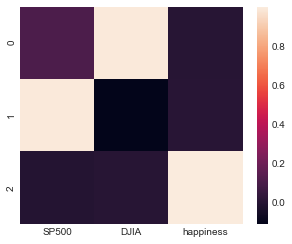

In [47]:
plt.show()

# I could see no major correlation.  There was correlation between DJIA and SP500, but nothing of major significanc? Should I normalize all the data to percentage.

# So I decided to check the other stocks along with happiness.

In [48]:
stocks_happiness_rev=stocks_happiness.replace('',float('nan'))

In [49]:
stocks_happiness_rev

,dates,happiness,SP500,DJIA,NASDAQ,Russell1000
0,1963-12-31T00:00:00Z,77.258940,69.865000,714.692430,NaN,NaN
1,1964-12-31T00:00:00Z,74.992500,81.368333,834.085178,NaN,NaN
2,1965-12-31T00:00:00Z,70.992900,88.170000,910.702659,NaN,NaN
3,1966-12-31T00:00:00Z,80.908575,85.256667,872.782500,NaN,NaN
4,1970-12-31T00:00:00Z,66.660000,83.220000,753.118071,NaN,NaN
5,1971-12-31T00:00:00Z,72.992700,98.283333,884.871937,NaN,NaN
6,1972-12-31T00:00:00Z,71.141033,109.208333,950.116972,NaN,NaN
7,1973-12-31T00:00:00Z,74.325900,107.423333,924.069722,NaN,NaN
8,1974-12-31T00:00:00Z,72.048350,82.552500,759.129368,NaN,NaN
9,1975-12-31T00:00:00Z,73.881500,86.155833,802.888577,NaN,NaN


In [50]:
stocks_pca_NASDAQ=stocks_happiness_rev['NASDAQ']
stocks_pca_m1= np.zeros(shape=(len(stocks_pca_SP500),4))
for i in range(0,len(stocks_happiness)):
    stocks_pca_m1[i][0]=float(stocks_pca_SP500[i])
    stocks_pca_m1[i][1]=float(stocks_pca_DJIA[i])
    stocks_pca_m1[i][2]=float(stocks_pca_NASDAQ[i])
    stocks_pca_m1[i][3]=float(stocks_pca_happiness[i])

In [51]:
stocks_pca_m1=stocks_pca_m1[~np.isnan(stocks_pca_m1).any(axis=1)]

In [52]:
stocks_pca_m1

array([[   963.68916667,   9006.63666667,   1658.077     ,     83.6583    ],
       [  1130.5475    ,  10315.51277778,   1986.34535714,     77.9922    ],
       [  1207.06083333,  10546.65555556,   2099.822749  ,     79.82535   ],
       [  1310.67      ,  11409.77972112,   2263.40996016,     77.6589    ],
       [  1220.88833333,  11244.04909091,   2164.24361111,     74.7703    ],
       [  1139.3075    ,  10668.5890873 ,   2349.89353175,     70.3263    ]])

In [53]:
pca=decomposition.PCA()
stocks_pca_t1= pca.fit_transform(stocks_pca_m1)

In [54]:
pca.explained_variance_ratio_

array([  9.82428050e-01,   1.63319550e-02,   1.23981625e-03,
         1.79090578e-07])

In [55]:
components1= pd.DataFrame(pca.components_, columns=['SP500','DJIA','NASDAQ','happiness'])

In [56]:
components1

,SP500,DJIA,NASDAQ,happiness
0,-0.125302,-0.961249,-0.245539,0.003295
1,-0.141712,-0.227616,0.963074,-0.024447
2,-0.979868,0.155368,-0.109034,-0.061889
3,0.063836,-0.007235,-0.017645,-0.997778


In [57]:
sb.heatmap(components1)

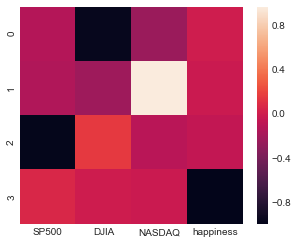

In [58]:
plt.show()

# decided to make all of them into percentages

In [59]:
stocks_happiness_rev1=stocks_happiness_rev

In [60]:
max_NASDAQ=stocks_happiness_rev1['NASDAQ'].max()
max_DJIA=stocks_happiness_rev1['DJIA'].max()
max_SP500=stocks_happiness_rev1['SP500'].max()
max_Russell1000=stocks_happiness_rev1['Russell1000'].max()
#max_happiness=stocks_happiness_rev['happiness'].max()

In [61]:
stocks_happiness_rev1['NASDAQ']=stocks_happiness_rev['NASDAQ']/max_NASDAQ*100
stocks_happiness_rev1['SP500']=stocks_happiness_rev['SP500']/max_SP500*100
stocks_happiness_rev1['DJIA']=stocks_happiness_rev['DJIA']/max_DJIA*100
stocks_happiness_rev1['Russell1000']=stocks_happiness_rev['Russell1000']/max_Russell1000*100
stocks_happiness_rev1['happiness']=stocks_happiness_rev['happiness']
#stocks_happiness_rev['happiness']=stocks_happiness_rev['happiness']/max_happiness*100

In [62]:
stocks_happiness_rev1

,dates,happiness,SP500,DJIA,NASDAQ,Russell1000
0,1963-12-31T00:00:00Z,77.258940,4.895910,6.263858,NaN,NaN
1,1964-12-31T00:00:00Z,74.992500,5.702026,7.310265,NaN,NaN
2,1965-12-31T00:00:00Z,70.992900,6.178664,7.981772,NaN,NaN
3,1966-12-31T00:00:00Z,80.908575,5.974507,7.649425,NaN,NaN
4,1970-12-31T00:00:00Z,66.660000,5.831784,6.600636,NaN,NaN
5,1971-12-31T00:00:00Z,72.992700,6.887373,7.755381,NaN,NaN
6,1972-12-31T00:00:00Z,71.141033,7.652961,8.327216,NaN,NaN
7,1973-12-31T00:00:00Z,74.325900,7.527874,8.098927,NaN,NaN
8,1974-12-31T00:00:00Z,72.048350,5.785008,6.653322,NaN,NaN
9,1975-12-31T00:00:00Z,73.881500,6.037518,7.036846,NaN,NaN


In [63]:
stocks_pca_NASDAQ=stocks_happiness_rev1['NASDAQ']
stocks_pca_SP500=stocks_happiness_rev1['SP500']
stocks_pca_DJIA=stocks_happiness_rev1['DJIA']
stocks_pca_happiness=stocks_happiness_rev1['happiness']
stocks_pca_m2= np.zeros(shape=(len(stocks_pca_SP500),4))
for i in range(0,len(stocks_pca_happiness)):
    stocks_pca_m2[i][0]=float(stocks_pca_SP500[i])
    stocks_pca_m2[i][1]=float(stocks_pca_DJIA[i])
    stocks_pca_m2[i][2]=float(stocks_pca_NASDAQ[i])
    stocks_pca_m2[i][3]=float(stocks_pca_happiness[i])

In [64]:
stocks_pca_m2=stocks_pca_m2[~np.isnan(stocks_pca_m2).any(axis=1)]

In [65]:
stocks_pca_m2[:,:3]

array([[  67.53217251,   78.93786635,   70.55966484],
       [  79.22505663,   90.40939466,   84.52916399],
       [  84.5868598 ,   92.43522499,   89.35820796],
       [  91.84745   ,  100.        ,   96.31968128],
       [  85.5558456 ,   98.54746863,   92.09964545],
       [  79.83892867,   93.50390058,  100.        ]])

In [66]:
stocks_pca_m2[:]

array([[  67.53217251,   78.93786635,   70.55966484,   83.6583    ],
       [  79.22505663,   90.40939466,   84.52916399,   77.9922    ],
       [  84.5868598 ,   92.43522499,   89.35820796,   79.82535   ],
       [  91.84745   ,  100.        ,   96.31968128,   77.6589    ],
       [  85.5558456 ,   98.54746863,   92.09964545,   74.7703    ],
       [  79.83892867,   93.50390058,  100.        ,   70.3263    ]])

In [67]:
pca=decomposition.PCA()
stocks_pca_t2= pca.fit_transform(stocks_pca_m2)

In [68]:
components2= pd.DataFrame(pca.components_, columns=['SP500','DJIA','NASDAQ','happiness'])

In [69]:
components2

,SP500,DJIA,NASDAQ,happiness
0,-0.503350,-0.488141,-0.676387,0.225516
1,-0.626911,-0.273135,0.480606,-0.548998
2,-0.198292,0.650674,-0.500558,-0.535487
3,0.560627,-0.513556,-0.246901,-0.600831


In [70]:
sb.heatmap(components2)

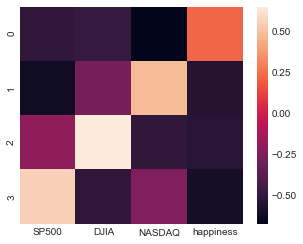

In [71]:
plt.show()

In [72]:
pca.explained_variance_ratio_

array([  8.79035550e-01,   1.08088747e-01,   1.26651971e-02,
         2.10506318e-04])

In [73]:
float(pca.explained_variance_ratio_[0])*100

87.90355495792613

# 87.9% of the data between 2003 and 2010 tells me that stocks and happiness are negatively correlated. As stocks goes down, happiness goes up. What?!

# Now I tried going back a step up, to check this out. That is  removing NASDAQ as that was limiting my searching period.

In [74]:
stocks_pca_m3= np.zeros(shape=(len(stocks_pca_SP500),3))
for i in range(0,len(stocks_pca_happiness)):
    stocks_pca_m3[i][0]=float(stocks_pca_SP500[i])
    stocks_pca_m3[i][1]=float(stocks_pca_DJIA[i])
    stocks_pca_m3[i][2]=float(stocks_pca_happiness[i])

In [75]:
stocks_pca_m3=stocks_pca_m3[~np.isnan(stocks_pca_m3).any(axis=1)]

In [76]:
stocks_pca_m3

array([[   4.8959098 ,    6.26385827,   77.25894   ],
       [   5.70202563,    7.31026539,   74.9925    ],
       [   6.17866409,    7.98177249,   70.9929    ],
       [   5.97450726,    7.64942463,   80.908575  ],
       [   5.83178435,    6.60063638,   66.66      ],
       [   6.88737329,    7.75538142,   72.9927    ],
       [   7.65296141,    8.32721573,   71.14103333],
       [   7.52787447,    8.09892693,   74.3259    ],
       [   5.78500814,    6.65332185,   72.04835   ],
       [   6.03751791,    7.03684555,   73.8815    ],
       [   7.14934341,    8.54705994,   73.49265   ],
       [   6.88223433,    7.8382636 ,   77.3256    ],
       [   6.72876632,    7.19675358,   75.6591    ],
       [   8.32394597,    7.81017874,   74.6592    ],
       [   8.97273957,    8.17641576,   79.19208   ],
       [   8.38993488,    7.75237   ,   78.9921    ],
       [  11.24205724,   10.43649099,   72.9927    ],
       [  11.24497711,   10.32929323,   73.49265   ],
       [  13.09383448,   11.

In [77]:
pca=decomposition.PCA()
stocks_pca_t3= pca.fit_transform(stocks_pca_m3)

In [78]:
components3= pd.DataFrame(pca.components_, columns=['SP500','DJIA','happiness'])

In [79]:
components3

,SP500,DJIA,happiness
0,0.674342,0.737943,0.026513
1,0.072476,-0.101877,0.992153
2,0.734854,-0.667129,-0.122183


In [80]:
sb.heatmap(components3)

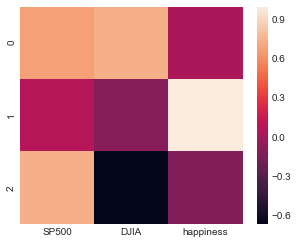

In [81]:
plt.show()

In [82]:
pca.explained_variance_ratio_

array([ 0.99197898,  0.00541129,  0.00260972])

# Now it tells me 99% of the stocks data from 1960( DJIA and  SP500) are positively correlated to happiness? Contradictory. Need to check this out a bit more? What if I take the internet data and merge it with this 

# I would need to also remove the NASDAQ data and run it again from 2003.

In [83]:
stocks_pca_m4=np.delete(stocks_pca_m2,2,axis=1) #Removed NASDAQ

In [84]:
stocks_pca_m4

array([[  67.53217251,   78.93786635,   83.6583    ],
       [  79.22505663,   90.40939466,   77.9922    ],
       [  84.5868598 ,   92.43522499,   79.82535   ],
       [  91.84745   ,  100.        ,   77.6589    ],
       [  85.5558456 ,   98.54746863,   74.7703    ],
       [  79.83892867,   93.50390058,   70.3263    ]])

In [85]:
pca=decomposition.PCA()
stocks_pca_t4= pca.fit_transform(stocks_pca_m4)

In [86]:
components3= pd.DataFrame(pca.components_, columns=['SP500','DJIA','happiness'])

In [87]:
components3

,SP500,DJIA,happiness
0,-0.710850,-0.662391,0.236494
1,-0.409249,0.116072,-0.905010
2,-0.572020,0.740112,0.353593


In [88]:
sb.heatmap(components3)

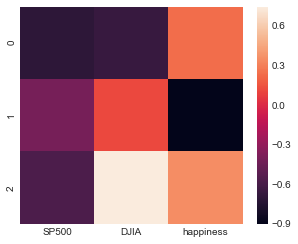

In [89]:
plt.show()

In [90]:
pca.explained_variance_ratio_

array([ 0.88308282,  0.11261851,  0.00429867])

# Still negatively correlated when the date is set from 2003 and the stocks are only DJIA and SP500

# Hence, stocks from 2003 are negatively correlated to happiness and all stocks from 1960 to 2003 are positively correlated.

# Sometimes having missing data helps.

In [154]:
internet=pd.read_csv('internet.csv' ,  dtype = {'dates': str,'percentage': float})

In [155]:
internet.head()

,dates,percentage
0,2015,74.550000
1,2014,73.000000
2,2013,71.400000
3,2012,74.700000
4,2011,69.729461


In [156]:
str(int(internet.iloc[0][0]))+"-12-31"+"T00:00:00Z"

'2015-12-31T00:00:00Z'

In [157]:
len(internet)

26

In [158]:
#internet.year = internet.year.astype(str)

In [159]:
for x in range(0,len(internet)):
    value=str(int(internet.loc[x][0]))+"-12-31"+"T00:00:00Z"
    internet.ix[x,0]=value
    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [160]:
internet

,dates,percentage
0,2015-12-31T00:00:00Z,74.550000
1,2014-12-31T00:00:00Z,73.000000
2,2013-12-31T00:00:00Z,71.400000
3,2012-12-31T00:00:00Z,74.700000
4,2011-12-31T00:00:00Z,69.729461
5,2010-12-31T00:00:00Z,71.690000
6,2009-12-31T00:00:00Z,71.000000
7,2008-12-31T00:00:00Z,74.000000
8,2007-12-31T00:00:00Z,75.000000
9,2006-12-31T00:00:00Z,68.931193


In [170]:
st_hp_in=pd.merge(internet,stocks_happiness_rev1,on='dates',how='inner')

In [184]:
#st_hp_in = st_hp_in.reset_index(drop=True)
st_hp_in

,dates,percentage,happiness,SP500,DJIA,NASDAQ,Russell1000
0,2010-12-31T00:00:00Z,71.690000,70.32630,79.838929,93.503901,100.000000,NaN
1,2008-12-31T00:00:00Z,74.000000,74.77030,85.555846,98.547469,92.099645,NaN
2,2006-12-31T00:00:00Z,68.931193,77.65890,91.847450,100.000000,96.319681,NaN
3,2005-12-31T00:00:00Z,67.968053,79.82535,84.586860,92.435225,89.358208,NaN
4,2004-12-31T00:00:00Z,64.758256,77.99220,79.225057,90.409395,84.529164,NaN
5,2003-12-31T00:00:00Z,61.697117,83.65830,67.532173,78.937866,70.559665,NaN
6,2002-12-31T00:00:00Z,58.785404,77.49225,69.770481,80.762757,NaN,NaN
7,2001-12-31T00:00:00Z,49.080832,75.32580,83.536935,89.447568,NaN,NaN
8,2000-12-31T00:00:00Z,43.079163,78.65880,100.000000,93.987370,NaN,NaN
9,1998-12-31T00:00:00Z,30.093197,76.99230,75.984943,75.653902,NaN,NaN


In [188]:
#stocks_pca_NASDAQ=stocks_happiness_rev['NASDAQ']
stocks_pca_m_in= np.zeros(shape=(len(st_hp_in),4))
print(stocks_pca_m_in)
for i in range(0,len(stocks_pca_m_in)):
    stocks_pca_m_in[i][0]=float(st_hp_in.iloc[i][1])
    stocks_pca_m_in[i][1]=float(st_hp_in.iloc[i][2])
    stocks_pca_m_in[i][2]=float(st_hp_in.iloc[i][3])
    stocks_pca_m_in[i][3]=float(st_hp_in.iloc[i][4])
stocks_pca_m_in

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


array([[  71.69      ,   70.3263    ,   79.83892867,   93.50390058],
       [  74.        ,   74.7703    ,   85.5558456 ,   98.54746863],
       [  68.93119327,   77.6589    ,   91.84745   ,  100.        ],
       [  67.96805292,   79.82535   ,   84.5868598 ,   92.43522499],
       [  64.75825648,   77.9922    ,   79.22505663,   90.40939466],
       [  61.69711712,   83.6583    ,   67.53217251,   78.93786635],
       [  58.78540388,   77.49225   ,   69.77048123,   80.7627569 ],
       [  49.08083159,   75.3258    ,   83.53693539,   89.44756795],
       [  43.07916264,   78.6588    ,  100.        ,   93.98737028],
       [  30.09319659,   76.9923    ,   75.98494285,   75.65390176],
       [  16.41935296,   77.82555   ,   47.00944693,   50.34178841],
       [   9.2370883 ,   85.9914    ,   37.95623592,   39.4344978 ],
       [   4.86278064,   72.9927    ,   32.2583565 ,   33.25727326],
       [   2.27167329,   74.6592    ,   31.633097  ,   30.89382787],
       [   1.72420254,   77.9922  

In [189]:
pca=decomposition.PCA()
stocks_pca_t4= pca.fit_transform(stocks_pca_m_in)

In [190]:
components3= pd.DataFrame(pca.components_, columns=['internet','happiness','SP500','DJIA'])

In [191]:
components3

,internet,happiness,SP500,DJIA
0,-0.588540,-0.000336,-0.530217,-0.610320
1,-0.753935,0.020138,0.632084,0.177894
2,0.034267,0.997601,0.024546,-0.054918
3,0.289877,-0.066235,0.564568,-0.769966


In [192]:
sb.heatmap(components3)

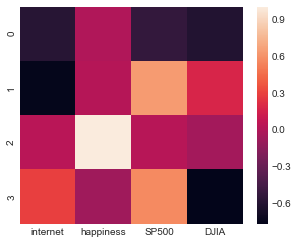

In [193]:
plt.show()

In [194]:
pca.explained_variance_ratio_

array([  9.58302162e-01,   3.56957704e-02,   5.48984520e-03,
         5.12222005e-04])

In [195]:
pca.explained_variance_ratio_[0]

0.95830216238292587